<a href="https://www.kaggle.com/code/raneemabdo/random-forest?scriptVersionId=148194071" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

In [2]:
auto=pd.read_csv("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/auto_mpg.csv")
print(auto.info())
print(auto.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.

In [3]:
auto['horsepower']=pd.to_numeric(auto.horsepower,errors='coerce')
auto.dropna(inplace=True)
auto['origin']=auto['origin'].map({1:'USA',2:'Europe',3:'Japan'})
auto=pd.get_dummies(auto,columns=['origin'],prefix='',prefix_sep='',drop_first=True)
x=auto.drop(['mpg','car name'],axis=1)
y=auto['mpg']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [5]:
rf_reg=RandomForestRegressor(random_state=1)
rf_reg.fit(x_train,y_train)
preds=rf_reg.predict(x_test)
rmse=np.sqrt(MSE(preds,y_test))
print("Test Set RMSE ",rmse)

Test Set RMSE  2.5842607835642957


**Feature Impotance**

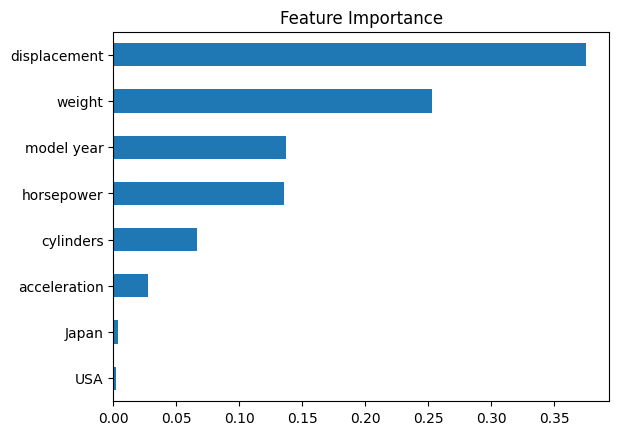

In [6]:
importance=pd.Series(data=rf_reg.feature_importances_,index=x_train.columns)
importance_sorted=importance.sort_values()
importance_sorted.plot(kind='barh')
plt.title('Feature Importance')
plt.show()